## [Yolov5] Custom Dataset으로 YOLO 학습
- 목표 : 잎 탐지 전용 Yolo모델
- 활용 데이터 셋 : hub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=153


In [32]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Yolo 학습 구조

- Yolo train 폴더 구조
  - CustomDataset <br>
  ㄴ train/<br>
  &nbsp;&nbsp;&nbsp; 1.jpg(이미지 파일)<br>
  &nbsp;&nbsp;&nbsp; 1.txt(어노테이션 파일)<br>
  ㄴ valid/<br>
  &nbsp;&nbsp;&nbsp; 2.jpg(이미지 파일)<br>
  &nbsp;&nbsp;&nbsp; 2.txt(어노테이션 파일)<br>
  ㄴ test/<br>
  &nbsp;&nbsp;&nbsp; 3.jpg(이미지 파일)<br>
  &nbsp;&nbsp;&nbsp; 3.txt(어노테이션 파일)<br>
   .yaml<br>

In [33]:
import os

# 커스텀 데이터 루트 폴더
root_dir = "/content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/"
extensions = ["json", "txt", "jpg", "JPG", "png", "PNG"]
subsets = ["train", "valid", "test"]
yaml_path = os.path.join(root_dir, "config.yaml")

In [34]:
import glob

def get_file_list(root_dir, subsets, extensions):
    file_lists = {subset: [] for subset in subsets}

    for subset in subsets:
        for ext_label in extensions:
            file_lists[subset].extend(glob.glob(os.path.join(root_dir, subset, f"*.{ext_label}")))

    return file_lists

# 예시 사용

file_lists = get_file_list(root_dir, subsets, extensions)

print("Train file list:", file_lists["train"])
print("Valid file list:", file_lists["valid"])
print("Test file list:", file_lists["test"])


Train file list: ['/content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train/V006_77_0_00_10_03_11_0_c37_20201209_0036_S01_2.txt', '/content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train/V006_77_0_00_10_03_11_0_c37_20201209_0039_S01_2.txt', '/content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train/V006_77_0_00_10_03_11_0_c37_20201209_0054_S01_2.txt', '/content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train/V006_77_0_00_10_03_11_0_c37_20201209_0042_S01_2.txt', '/content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train/V006_77_0_00_10_03_11_0_c37_20201209_0033

In [35]:
import os

def write_file_list_to_txt(file_list, output_path):
    if os.path.exists(output_path):
        os.remove(output_path)
    with open(output_path, 'w') as f:
        f.write('\n'.join(file_list) + '\n')

# 예시 사용
write_file_list_to_txt(file_lists["train"], os.path.join(root_dir, "train.txt"))
write_file_list_to_txt(file_lists["valid"], os.path.join(root_dir, "valid.txt"))
write_file_list_to_txt(file_lists["test"], os.path.join(root_dir, "test.txt"))

In [36]:
import yaml
data = {
    "train" : os.path.join(root_dir, "train.txt"),
    "val" : os.path.join(root_dir, "valid.txt"),
    "test" : os.path.join(root_dir, "train.txt"),
    "names" : {0 : 'leaf'}}

with open(yaml_path, 'w') as f :
    yaml.dump(data, f)

# check written file
with open(yaml_path, 'r') as f :
    lines = yaml.safe_load(f)
    print(lines)

{'names': {0: 'leaf'}, 'test': '/content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train.txt', 'train': '/content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train.txt', 'val': '/content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/valid.txt'}


In [37]:
!pip install ultralytics

In [38]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

model.train(data = yaml_path , epochs=20)

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

train: Scanning /content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train... 258 images, 15 backgrounds, 0 corrupt: 100%|██████████| 273/273 [00:21<00:00, 12.43it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train/V006_77_0_00_10_03_12_0_c15_20201229_0014_S01_3.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train/V006_77_0_00_10_03_12_0_c15_20201229_0015_S01_3.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train/V006_77_0_00_10_03_12_0_c15_20201229_0017_S01_3.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train/V006_77_0_00_10_03_12_0_c15_20201229_0018_S01_3.jpg: corrupt JPEG restored and saved
train: WARNI

train: New cache created: /content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/valid... 0 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

val: WARNING ⚠️ No labels found in /content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/valid.cache. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.
val: New cache created: /content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/valid.cache
WARNING ⚠️ No labels found in /content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/YOLO_CustomDataSet/valid.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.55G     0.8485      3.029      1.377          2        640: 100%|██████████| 18/18 [00:38<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.27G     0.5999      1.121      1.105          4        640: 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.93it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.41G      0.644     0.9333      1.128          4        640: 100%|██████████| 18/18 [00:26<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.23G      0.716     0.8646      1.193          2        640: 100%|██████████| 18/18 [00:26<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.23G     0.7549     0.8694        1.2          4        640: 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.25G     0.6662     0.7812      1.131          2        640: 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.74it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.24G     0.6777     0.7521      1.119          4        640: 100%|██████████| 18/18 [00:28<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.24G     0.7106     0.7824      1.163          2        640: 100%|██████████| 18/18 [00:26<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.85it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.22G     0.6051     0.6524      1.076          1        640: 100%|██████████| 18/18 [00:26<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.24G     0.6247     0.6679       1.13          2        640: 100%|██████████| 18/18 [00:25<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.83it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.23G     0.4827     0.7304      1.038          1        640: 100%|██████████| 18/18 [00:40<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.23it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.24G     0.4513     0.5325      0.997          1        640: 100%|██████████| 18/18 [00:28<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.24G      0.396     0.8429     0.9041          0        640: 100%|██████████| 18/18 [00:29<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.62it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.24G     0.4075     0.4613     0.9393          1        640: 100%|██████████| 18/18 [00:34<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.86it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.23G     0.3643     0.4201     0.9219          1        640: 100%|██████████| 18/18 [00:22<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.25G     0.3479     0.3945      0.941          1        640: 100%|██████████| 18/18 [00:24<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.23G       0.44     0.4125      1.033          1        640: 100%|██████████| 18/18 [00:25<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.24G      0.311     0.3767     0.8648          1        640: 100%|██████████| 18/18 [00:25<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.29it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.24G     0.2736     0.3411      0.878          1        640: 100%|██████████| 18/18 [00:26<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.24G     0.2714      0.329     0.8677          1        640: 100%|██████████| 18/18 [00:24<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.80it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



20 epochs completed in 0.177 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 2.2ms preprocess, 47.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train4


AttributeError: 'DetMetrics' object has no attribute 'curves_results'. See valid attributes below.

    This class is a utility class for computing detection metrics such as precision, recall, and mean average precision
    (mAP) of an object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (tuple of str): A tuple of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (tuple of str): A tuple of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    


image 1/1 /content/참외1.png: 448x640 1 leaf, 13.8ms
Speed: 2.5ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


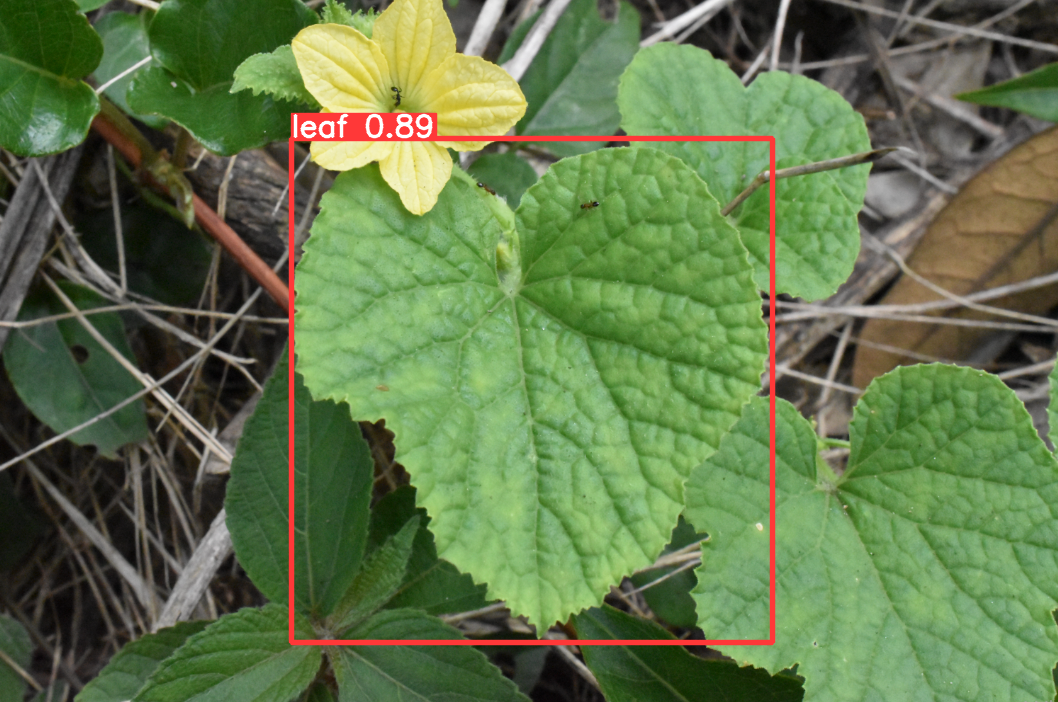

In [39]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# model = YOLO('yolov8s.pt')

# finetuning된 가중치 파일이 저장되는 디폴트 경로
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model('/content/참외1.png') # conf=0.2, iou ..

plots = results[0].plot()
cv2_imshow(plots)
cv2.waitKey(0)
cv2.destroyAllWindows()